In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter


Bad key "text.kerning_factor" on line 4 in
C:\Users\TinkerBell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_recall_curve

### Read the data from encoded CSV that was saved earlier(from credit_risj_resample.ipynb) after integer encoding & binary encoding using logical encoder and get_dummies. 


In [4]:
file_path = Path('../Resources/credit_risk_encoded.zip')
df_encoded = pd.read_csv(file_path)
df_encoded.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,...,issue_d_Mar-2019,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App
0,10500.0,0.1719,375.35,66000.0,low_risk,0,27.24,0.0,0.0,8.0,...,1,0,1,0,0,1,0,1,1,0
1,25000.0,0.2000,929.09,105000.0,low_risk,0,20.23,0.0,0.0,17.0,...,1,0,0,1,0,1,0,1,1,0
2,20000.0,0.2000,529.88,56000.0,low_risk,0,24.26,0.0,0.0,8.0,...,1,0,0,1,0,1,0,1,1,0
3,10000.0,0.1640,353.55,92000.0,low_risk,0,31.44,0.0,1.0,10.0,...,1,0,0,1,0,1,0,1,1,0
4,22000.0,0.1474,520.39,52000.0,low_risk,0,18.76,0.0,1.0,14.0,...,1,1,0,0,0,1,0,1,1,0


# Split the Data into Training and Testing

In [5]:
# Create our features
X = df_encoded.drop('loan_status', axis=1)

# Create our target
y = df_encoded['loan_status']

In [6]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,issue_d_Mar-2019,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.0,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000
mean,16677.594562,0.127718,480.652863,8.821371e+04,0.0,21.778153,0.217766,0.497697,12.587340,0.126030,...,0.177238,0.478007,0.373992,0.148001,0.123879,0.876121,0.383161,0.616839,0.860340,0.139660
std,10277.348590,0.048130,288.062432,1.155800e+05,0.0,20.199244,0.718367,0.758122,6.022869,0.336797,...,0.381873,0.499520,0.483865,0.355104,0.329446,0.329446,0.486161,0.486161,0.346637,0.346637
min,1000.000000,0.060000,30.890000,4.000000e+01,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9000.000000,0.088100,265.730000,5.000000e+04,0.0,13.890000,0.000000,0.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,15000.000000,0.118000,404.560000,7.300000e+04,0.0,19.760000,0.000000,0.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,24000.000000,0.155700,648.100000,1.040000e+05,0.0,26.660000,0.000000,1.000000,16.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,40000.000000,0.308400,1676.230000,8.797500e+06,0.0,999.000000,18.000000,5.000000,72.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Check the balance of our target values
y.value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [8]:
# Split the X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [9]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [10]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
std_scaler = scaler.fit(X_train)

In [11]:
# Scale the training and testing data
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

# Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Print the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier onely, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [12]:
# Resample the training data with the BalancedRandomForestClassifier
brf_clf = BalancedRandomForestClassifier(criterion='gini', max_depth=None, max_features='auto',
                max_leaf_nodes=None, min_impurity_decrease=0.0,
                min_samples_leaf=2, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                oob_score=False, random_state=1, replacement=False,
                sampling_strategy='auto', verbose=0, warm_start=False)

brf_clf.fit(X_train_scaled, y_train)
y_pred_brf = brf_clf.predict(X_test_scaled)

In [13]:
# Calculated the balanced accuracy score
blncd_acc_score_brf = balanced_accuracy_score(y_test, y_pred_brf)
blncd_acc_score_brf

0.7741670456479819

In [14]:
# Display the confusion matrix
c_matrix_brf = confusion_matrix(y_test, y_pred_brf)
pd.DataFrame(c_matrix_brf, columns=['Predicted_low', 'predicted_high'], index=['Actual_low', 'Actual_high'])

,Predicted_low,predicted_high
Actual_low,59,33
Actual_high,1591,15522


In [15]:
# Print the imbalanced classification report
imb_clf_report_brf = classification_report_imbalanced(y_test, y_pred_brf)
print(imb_clf_report_brf)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.64      0.91      0.07      0.76      0.57        92
   low_risk       1.00      0.91      0.64      0.95      0.76      0.60     17113

avg / total       0.99      0.91      0.64      0.95      0.76      0.60     17205



In [16]:
def plot_feature_imp(df):
    """function to plot the features importance"""
    df.set_index(df[1], inplace=True)
    df.drop(columns=1, inplace=True)
    df.rename(columns={0: 'Feature Importances'}, inplace=True)
    importances_sorted = df[:10].sort_values(by='Feature Importances')
    plot = importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
    return plot

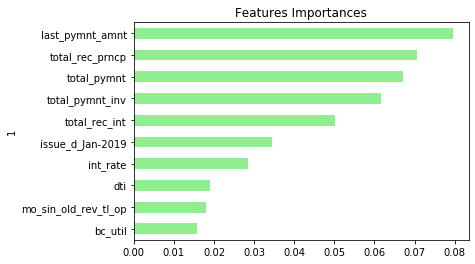

In [17]:
# List the features sorted in descending order by feature importance. We will select the top 10 features
feature_imp = brf_clf.feature_importances_

# capture the top 10 feature importance in dataframe
feature_imp_df = pd.DataFrame(sorted(zip(feature_imp, X.columns), reverse=True))
plot_feature_imp(feature_imp_df)

### Easy Ensemble Classifier

In [18]:
# Train the EasyEnsembleClassifier
ee_clf = EasyEnsembleClassifier(base_estimator=None, n_estimators=100, n_jobs=1,
                                random_state=1, replacement=False, sampling_strategy='auto',
                                verbose=0, warm_start=False)
ee_clf.fit(X_train_scaled, y_train) 
y_pred_eec = ee_clf.predict(X_test_scaled)

In [19]:
# Calculated the balanced accuracy score
blncd_acc_score_eec = balanced_accuracy_score(y_test, y_pred_eec)
blncd_acc_score_eec

0.9242071245099708

In [20]:
# Display the confusion matrix
c_matrix_eec = confusion_matrix(y_test, y_pred_eec)
pd.DataFrame(c_matrix_eec, columns=['Predicted_low', 'predicted_high'], index=['Actual_low', 'Actual_high'])

,Predicted_low,predicted_high
Actual_low,84,8
Actual_high,1106,16007


In [21]:
# Print the imbalanced classification report
imb_clf_report_eec = classification_report_imbalanced(y_test, y_pred_eec)
print(imb_clf_report_eec)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.07      0.91      0.94      0.13      0.92      0.85        92
   low_risk       1.00      0.94      0.91      0.97      0.92      0.86     17113

avg / total       0.99      0.94      0.91      0.96      0.92      0.86     17205



In [22]:
def cmatrix_plot(matrix, bac_score):
    """function to plot classification metrics and balanced accuracy score"""
    
    cmatrix_df = pd.DataFrame(columns=['model', 'TN', 'FP', 'FN', 'TP'])
    for k, v in matrix.items():
        v= v.ravel()
        cmatrix_df = cmatrix_df.append({'model': k, 'TN': int(v[0]), 'FP': int(v[1]), 'FN': int(v[2]), 'TP': int(v[3])}, ignore_index=True)

    cmatrix_df.set_index('model', inplace=True)
    cmatrix_df['Bac'] =  [round(x,2) for x in bac_score]
    cmatrix_df['pre'] =  cmatrix_df.apply(lambda row: round(row.TP/(row.FP+row.TP), 2), axis=1)
    cmatrix_df['rec'] =  cmatrix_df.apply(lambda row: round(row.TP/(row.FN+row.TP), 2), axis=1)
    cmatrix_df['spe'] =  cmatrix_df.apply(lambda row: round(row.TN/(row.TN+row.FP), 2), axis=1)
    cmatrix_df['geo'] =  cmatrix_df.apply(lambda row: round((row.rec + row.spe)/2, 2), axis=1)
    
    cmatrix_df = cmatrix_df.drop(['TN', 'FN', 'FP', 'TP'], axis=1)
    metrics_plot= cmatrix_df.plot(kind='bar', use_index=False, grid=True, figsize=(10, 5), label=False, position=1, table=True, rot=15, title='Classification Metrics')
    
    return metrics_plot

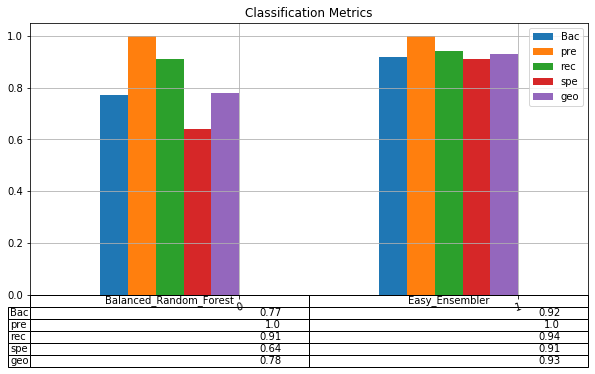

In [23]:
cmatrix={'Balanced_Random_Forest': c_matrix_brf, 'Easy_Ensembler': c_matrix_eec}
data = [blncd_acc_score_brf, blncd_acc_score_eec]
cmatrix_plot(cmatrix, data)

### Let's answer the questions:

1. Which model has best balanced accuracy score
* Easy Ensembler Classifer produced best BAC score of 0.92

2. Which model had the best recall score?
* Easy Ensembler Classifer provided best recall score among the two


3. Which model had the best geometric mean score?
* Easy Ensembler Classifer provided best recall score among the two

4. What are the top three features?
* Last Payment Amount
* Total recovered Principal
* total payment

### Conculsion
for our Data set, Easy Ensmbler Classification model performs better on all metrics. 